# Cross validation

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.multiclass import OneVsRestClassifier
#Import the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

print X.shape
print X[1,:]

(150L, 4L)
[ 4.9  3.   1.4  0.2]


In [20]:
print y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


This is a classification dataset that has 4 features and 150 examples.

In [21]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
print y

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [22]:
print n_classes

3


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

In [47]:
X_test.shape

(75L, 4L)

# One vs All Classifier

If we have N classes, we train N-1 binary classifiers, and use a tree logic to discern the right class

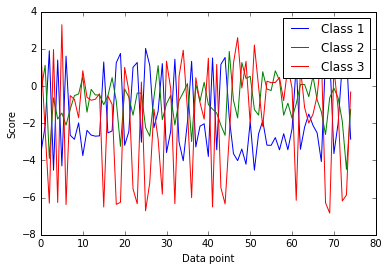

In [48]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=16))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

plt.plot(y_score)
plt.xlabel('Data point')
plt.ylabel('Score')
plt.legend(['Class 1', 'Class 2', 'Class 3'])

In [56]:
fpr, tpr, threshold_list = roc_curve(y_test[:, 1], y_score[:, 1])
print fpr, tpr, threshold_list

[ 0.          0.02222222  0.02222222  0.04444444  0.04444444  0.06666667
  0.06666667  0.11111111  0.11111111  0.2         0.2         0.31111111
  0.31111111  0.33333333  0.33333333  0.35555556  0.35555556  0.4         0.4
  0.53333333  0.53333333  0.57777778  0.57777778  0.6         0.6
  0.64444444  0.64444444  0.66666667  0.66666667  0.68888889  0.68888889
  1.        ] [ 0.03333333  0.03333333  0.1         0.1         0.2         0.2
  0.23333333  0.23333333  0.36666667  0.36666667  0.4         0.4         0.7
  0.7         0.73333333  0.73333333  0.76666667  0.76666667  0.8         0.8
  0.83333333  0.83333333  0.86666667  0.86666667  0.9         0.9
  0.93333333  0.93333333  0.96666667  0.96666667  1.          1.        ] [ 1.85915881  1.26137896  1.09555652  0.81548511  0.52114516  0.4967413
  0.45111054  0.3034696   0.08123477 -0.16378245 -0.18334473 -0.38553503
 -0.61433653 -0.63041055 -0.63258889 -0.63396965 -0.74548718 -0.78033367
 -0.81341433 -1.00014571 -1.23852652 -1.259

In [50]:
roc_auc = auc(fpr, tpr)
print roc_auc

1.0


In [62]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [63]:
roc_auc

{0: 1.0, 1: 0.71703703703703703, 2: 0.99509803921568629}

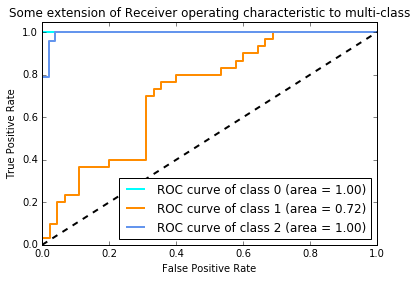

In [65]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw = 2
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

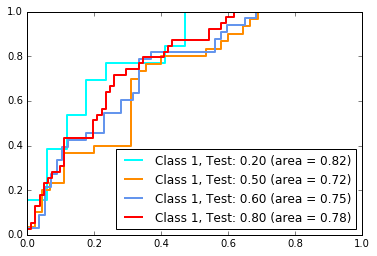

In [83]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
count_idx = 0
for test_size, color in zip([0.2, 0.5, 0.6, 0.8], colors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=0)
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                     random_state=16))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[1], tpr[1], color=color, lw=lw,
         label='Class {0}, Test: {1:0.2f} (area = {2:0.2f})'
         ''.format(1, test_size, roc_auc[1]))
    plt.legend(loc="lower right")
    count_idx +=1